In [1]:
import numpy as np
import pandas as pd
from deap import algorithms

from preprocessing import preprocess_data
from setup import setup_ea
from strategy_visualizer import print_strategy, plot_strategy, simulate_strategy, plot_fitness_over_generations

In [2]:
stock_data, ta_features, _ = preprocess_data("./data/wig_d.csv")
ta_features

,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,...,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_cr
365,0.006009,0.094874,0.941641,0.800880,0.820727,0.901769,0.615958,0.136714,0.459783,0.341002,...,0.714163,0.847761,0.883304,0.550882,0.754635,0.800912,0.454282,0.095323,0.723399,0.217329
366,0.010085,0.067148,0.908381,0.790832,0.819671,0.900598,0.613798,0.138438,0.493822,0.341002,...,0.714442,0.843452,0.880940,0.545478,0.774311,0.824712,0.455591,0.095391,0.682926,0.216556
367,0.030662,0.093509,0.968945,0.836003,0.821472,0.900718,0.652594,0.140952,0.516197,0.369727,...,0.733597,0.845106,0.879435,0.552450,0.775482,0.844046,0.431166,0.095770,0.740789,0.231158
368,0.021698,0.128281,0.921666,0.831179,0.821483,0.899950,0.658175,0.144114,0.555109,0.369727,...,0.682954,0.845887,0.878413,0.556376,0.820520,0.870848,0.472013,0.096149,0.691829,0.232766
369,0.014627,0.103969,0.872146,0.805248,0.817366,0.900179,0.647337,0.146147,0.526596,0.360938,...,0.685832,0.843416,0.877019,0.553355,0.788863,0.884323,0.399113,0.096263,0.669190,0.228294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,0.976102,0.938315,0.783798,0.993424,0.871783,0.991989,0.811603,0.312019,0.649625,0.412539,...,0.921568,0.966601,0.937050,0.723119,0.714089,0.754736,0.447659,0.349639,0.825358,0.471939
2279,0.981290,0.923087,0.820142,0.955853,0.829428,0.982671,0.809756,0.323694,0.666461,0.410112,...,0.931230,0.984643,0.956861,0.725604,0.695299,0.767887,0.397341,0.371642,0.681307,0.470523
2280,0.981810,0.906549,0.779111,0.914818,0.819299,0.980124,0.802191,0.335261,0.582716,0.410112,...,0.931895,0.993649,0.974810,0.710479,0.690118,0.777104,0.375822,0.379975,0.668755,0.465184
2281,0.994691,0.928762,0.837785,0.910447,0.817958,0.979381,0.814606,0.347676,0.654219,0.410112,...,0.915056,1.000000,0.990651,0.693349,0.733067,0.795286,0.424862,0.388276,0.706705,0.471686


In [3]:
# Genetic algorithm parameters:
POPULATION_SIZE = 10
N_GENERATIONS = 10
TOURNAMENT_SIZE_POPULATION_RATIO = 0.1
CROSSOVER_PROBABILITY = 0.5
MUTATION_PROBABILITY = 0.2

# Simulation parameters:
INITIAL_MONEY = 1000
# COMMISSION = 0.0001 # 0.01%
COMMISSION = 0

In [4]:
population, toolbox, stats, hall_of_fame = setup_ea(
    stock_data,
    ta_features,
    POPULATION_SIZE,
    TOURNAMENT_SIZE_POPULATION_RATIO,
    INITIAL_MONEY,
    COMMISSION,
)

In [5]:
_, logbook = algorithms.eaSimple(
    population,
    toolbox,
    ngen=N_GENERATIONS,
    cxpb=CROSSOVER_PROBABILITY,
    mutpb=MUTATION_PROBABILITY,
    stats=stats,
    halloffame=hall_of_fame,
    verbose=True,
)

gen	nevals	avg            	std          	min           	max           
0  	10    	[1026.09558092]	[275.9307755]	[546.19336548]	[1524.6921507]
1  	6     	[971.65293248] 	[214.12616865]	[546.19336548]	[1185.21448163]
2  	5     	[940.59845971] 	[233.38830534]	[591.8993544] 	[1319.01045535]
3  	3     	[752.38250667] 	[160.19883918]	[591.8993544] 	[1055.73755446]
4  	6     	[832.0813161]  	[186.34491731]	[591.8993544] 	[1198.56881362]
5  	8     	[879.00548011] 	[159.31467115]	[591.8993544] 	[1147.02816459]
6  	0     	[912.42023388] 	[170.94605358]	[591.8993544] 	[1147.02816459]
7  	7     	[1014.57775514]	[310.19548753]	[675.4923329] 	[1804.56164591]
8  	5     	[997.65524547] 	[137.9442847] 	[825.13251786]	[1235.74978781]
9  	6     	[840.19207901] 	[184.67567342]	[590.72361028]	[1235.74978781]
10 	8     	[821.69944315] 	[155.01544571]	[587.37479573]	[1033.03289478]


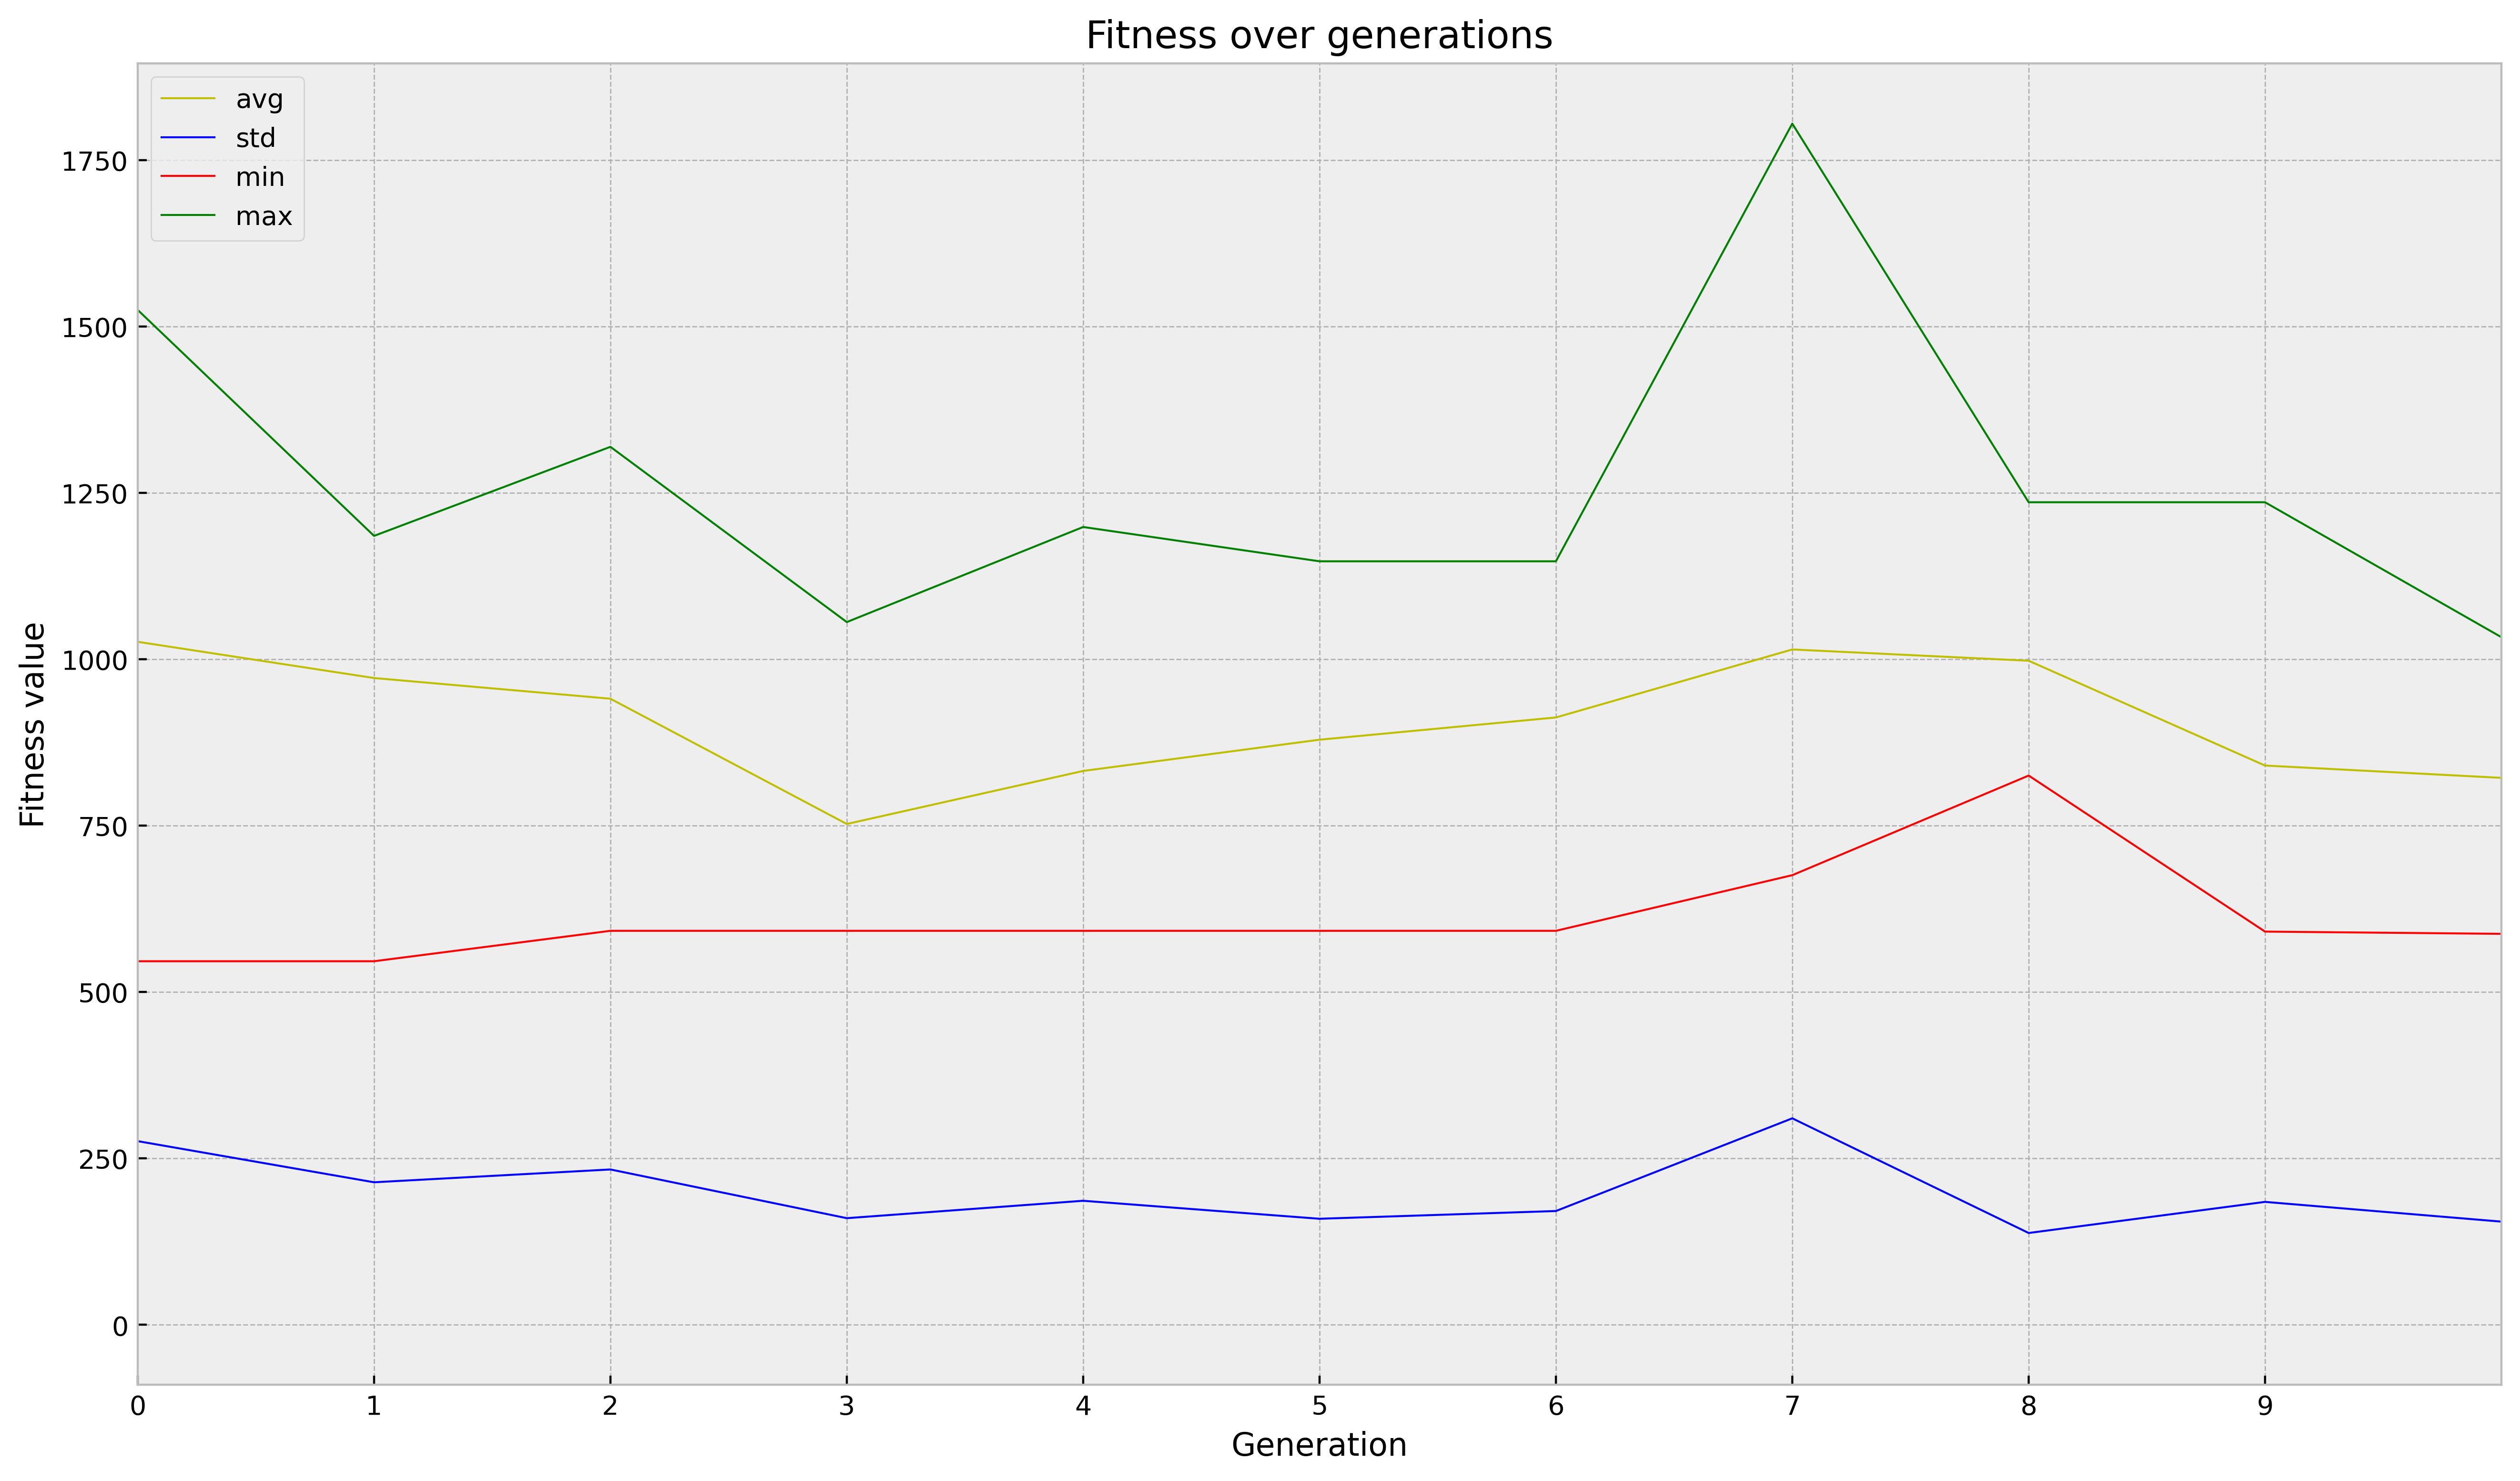

In [6]:
plot_fitness_over_generations(logbook)

In [7]:
best_strategy = hall_of_fame[0]
buy_strategy, sell_strategy = np.array_split(best_strategy, 2)
pd.DataFrame(
    zip(ta_features.columns, buy_strategy, sell_strategy),
    columns=["feature", "buy strategy weight", "sell strategy weight"],
)

,feature,buy strategy weight,sell strategy weight
0,volume_adi,0.241339,0.764976
1,volume_obv,0.572077,-0.260563
2,volume_cmf,-0.579478,0.058696
3,volume_fi,-0.505789,-0.958794
4,volume_em,-0.866968,-0.166452
...,...,...,...
72,momentum_pvo_signal,0.412731,0.870378
73,momentum_pvo_hist,0.675442,0.159606
74,momentum_kama,0.893510,0.931275
75,others_dr,0.937212,-0.201481


In [8]:
print_strategy(stock_data, ta_features, best_strategy, INITIAL_MONEY, COMMISSION)

      DATE:   2012-09-28        ACTION:          buy          OPEN:     43817.67         MONEY:            0        SHARES:  0.022821843
      DATE:   2012-10-01        ACTION:         sell          OPEN:     43631.67         MONEY:  995.7551371        SHARES:            0
      DATE:   2012-10-03        ACTION:          buy          OPEN:     44231.61         MONEY:            0        SHARES:  0.022512296
      DATE:   2012-10-04        ACTION:         sell          OPEN:     44228.82         MONEY:  995.6923278        SHARES:            0
      DATE:   2012-10-08        ACTION:          buy          OPEN:     44380.07         MONEY:            0        SHARES:  0.022435573
      DATE:   2012-10-09        ACTION:         sell          OPEN:     44378.72         MONEY:  995.6620398        SHARES:            0
      DATE:   2012-10-10        ACTION:          buy          OPEN:     43966.78         MONEY:            0        SHARES:  0.022645780
      DATE:   2012-10-11        ACTION:  

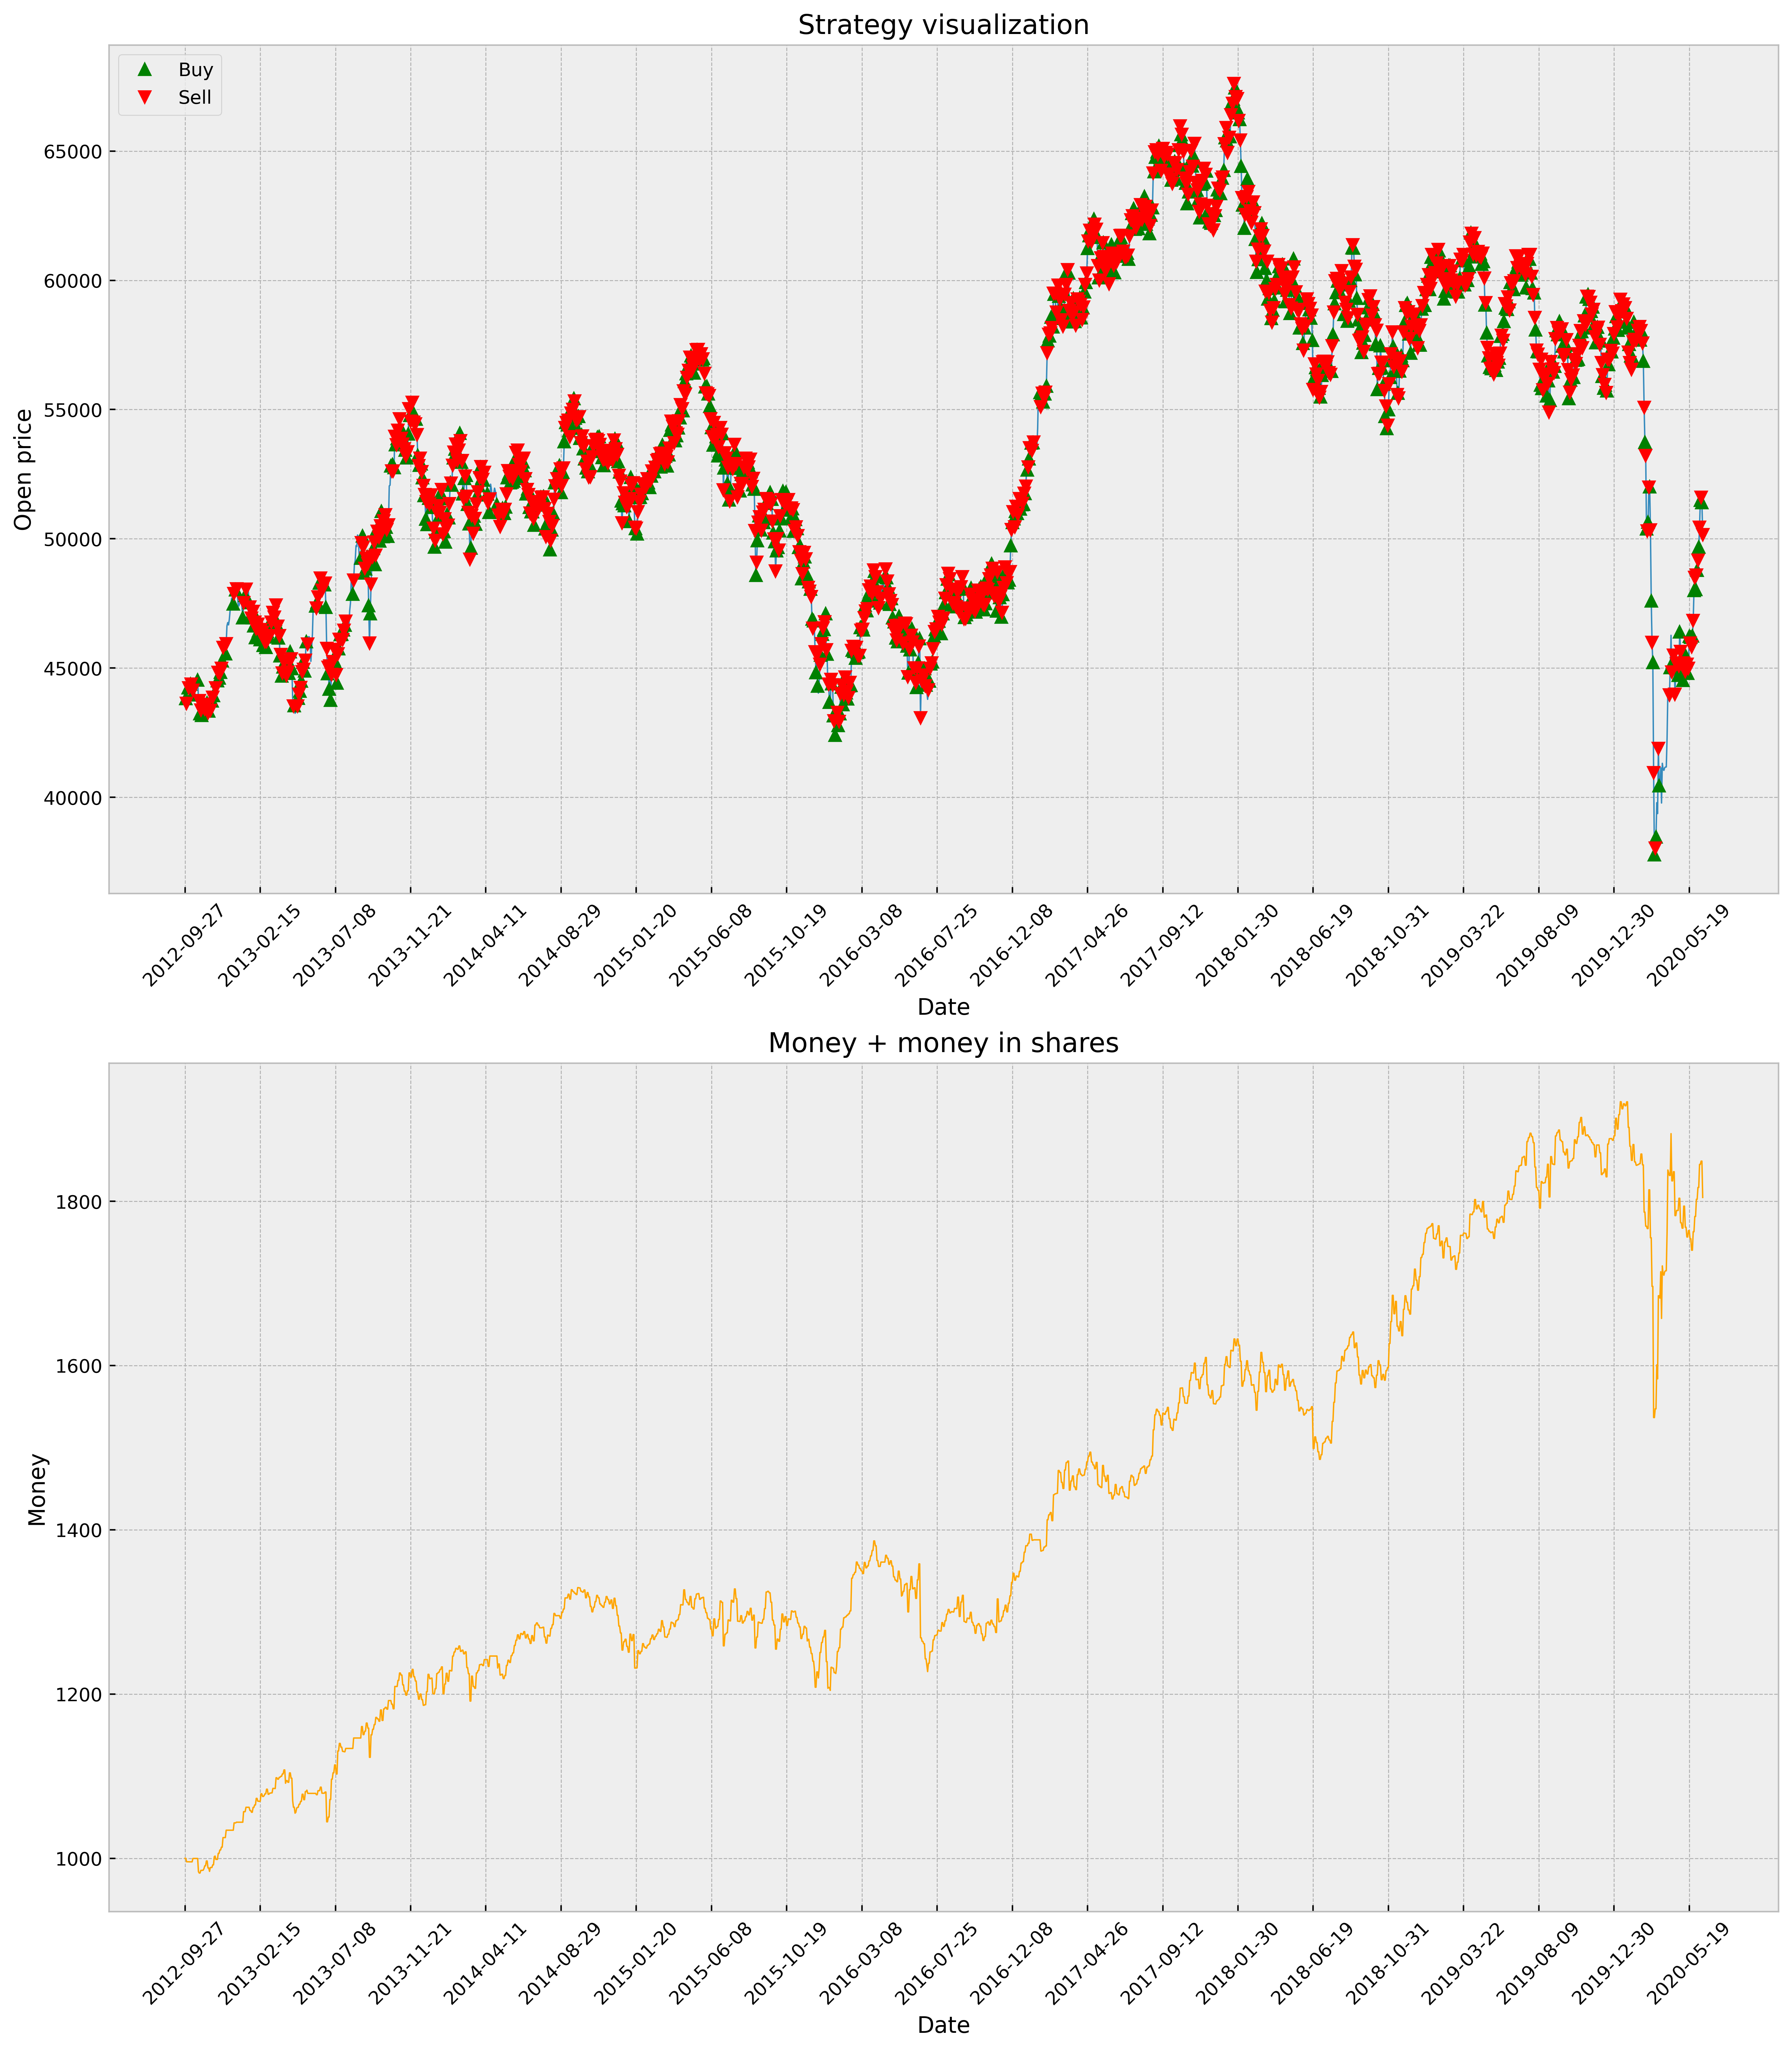

In [9]:
dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares = simulate_strategy(
    stock_data,
    ta_features,
    best_strategy,
    INITIAL_MONEY,
    COMMISSION,
)
plot_strategy(dates, close_prices, x_buy, y_buy, x_sell, y_sell, sum_money_and_money_in_shares)

In [12]:
hall_of_fame[0].fitness.values[0]

1804.56164591095